In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from scipy import stats 
from sklearn.preprocessing import StandardScaler
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sample_submission.csv']


**Load data**    

In [2]:
train=pd.read_csv("../input/train.csv")

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

After data analysis,  we finalized that following are the four variables that we are going for the further processing
* OverallQual 
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.

**Analyzing the target variable - 'SALEPRICE'**

In [4]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
train.SalePrice.isnull().sum()
#no nulll values

0

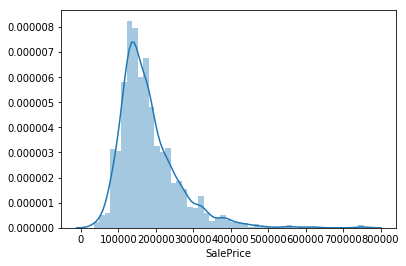

In [6]:
sns.distplot(train.SalePrice)
#Deviate from the normal distribution.
#Have positive skewness.

In [7]:
print ("skew:",train.SalePrice.skew())
print ("kurt:",train.SalePrice.kurt())

skew: 1.8828757597682129
kurt: 6.536281860064529


**Finding correlation**

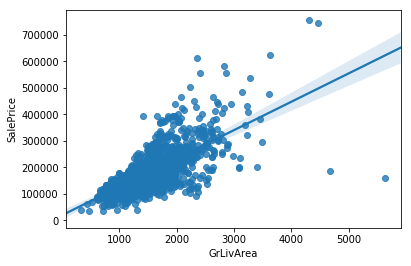

In [8]:
sns.regplot(train['GrLivArea'],train['SalePrice'])

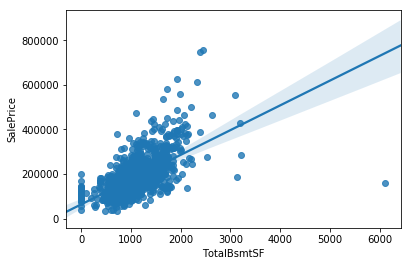

In [9]:
sns.regplot(train['TotalBsmtSF'],train['SalePrice'])

(-0.5, 9.5, 0, 800000)

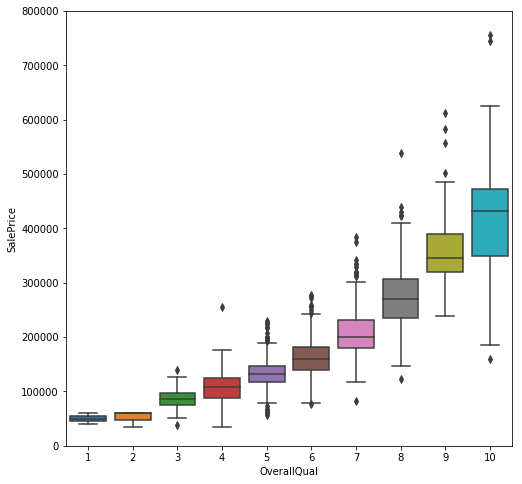

In [10]:
plt.figure(figsize=(8,8))
fig=sns.boxplot('OverallQual','SalePrice',data=train)
fig.axis(ymin=0, ymax=800000)

(-0.5, 111.5, 0, 800000)

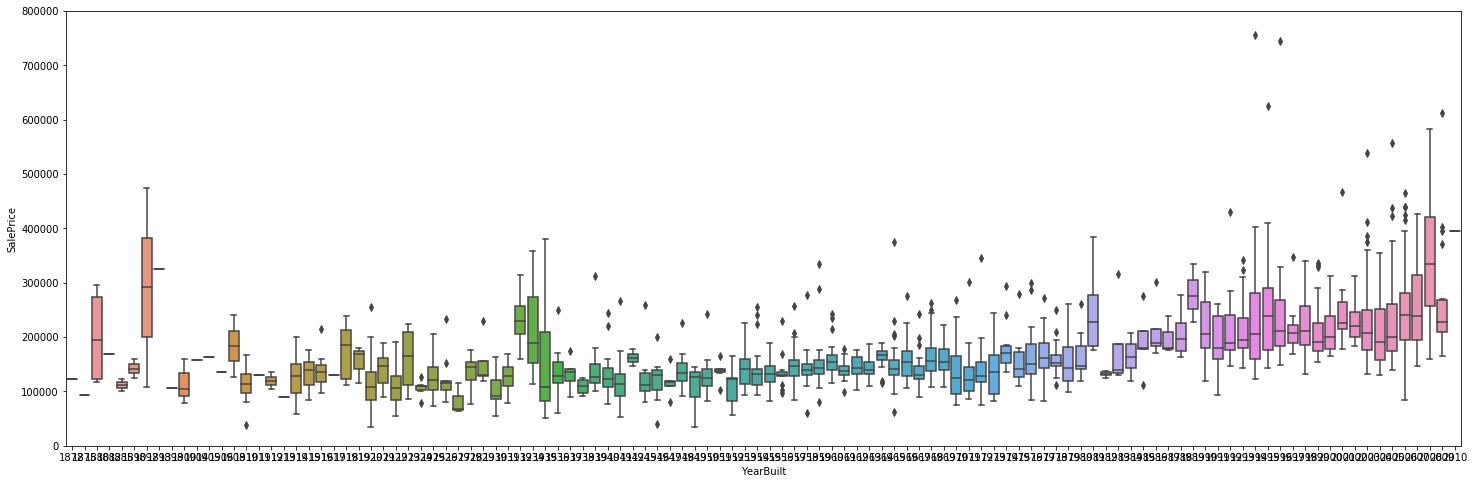

In [11]:
plt.figure(figsize=(25,8))
fig=sns.boxplot('YearBuilt','SalePrice',data=train)
fig.axis(ymin=0, ymax=800000)

**FINAL OBSERVATION**
GrLivArea,'TotalBsmtSF AND OverallQual are strongly correlated with SALEPRICE
'YearBuilt' also seem to be related with 'SalePrice. But relation is not that strong

**Analyse the correlation between saleprice and other attributes**

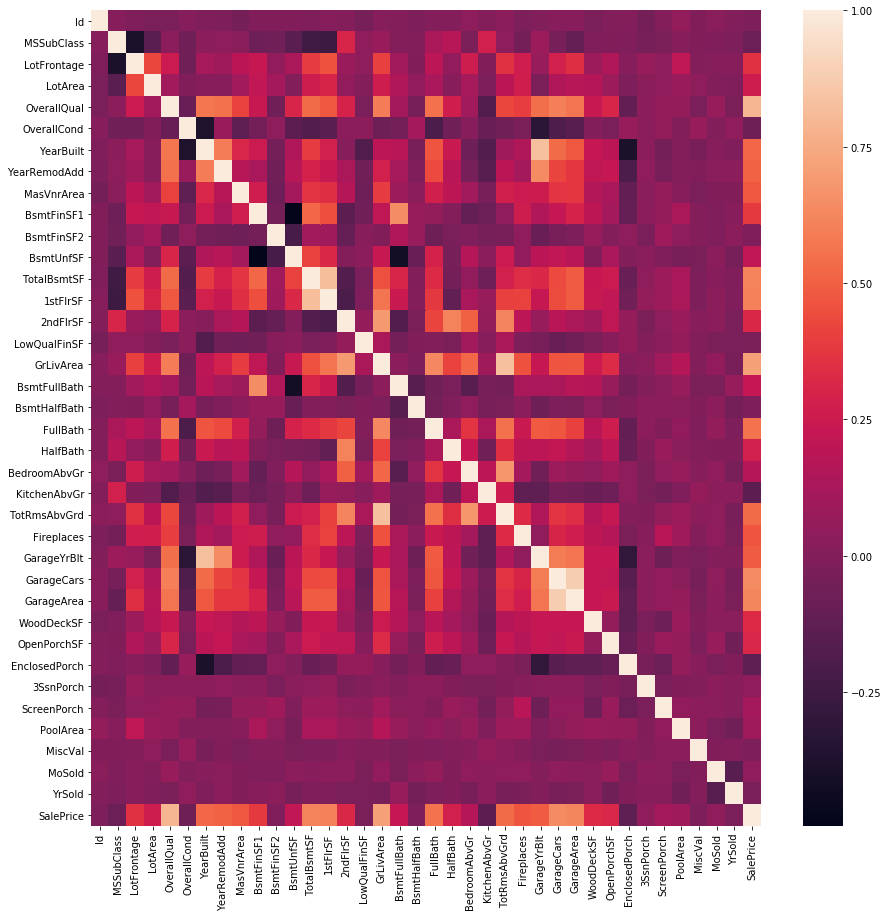

In [12]:
plt.figure(figsize=(15,15))
fig=sns.heatmap(train.corr())

In [13]:
corr_mat=train.corr()


In [14]:
cols=corr_mat.nlargest(10,'SalePrice')['SalePrice'].index
cm=np.corrcoef(train[cols].values.T)

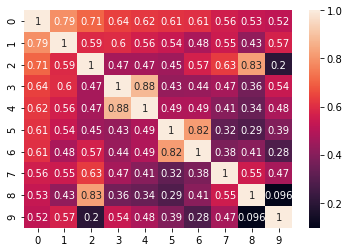

In [15]:
sns.heatmap(cm,annot=True)
#

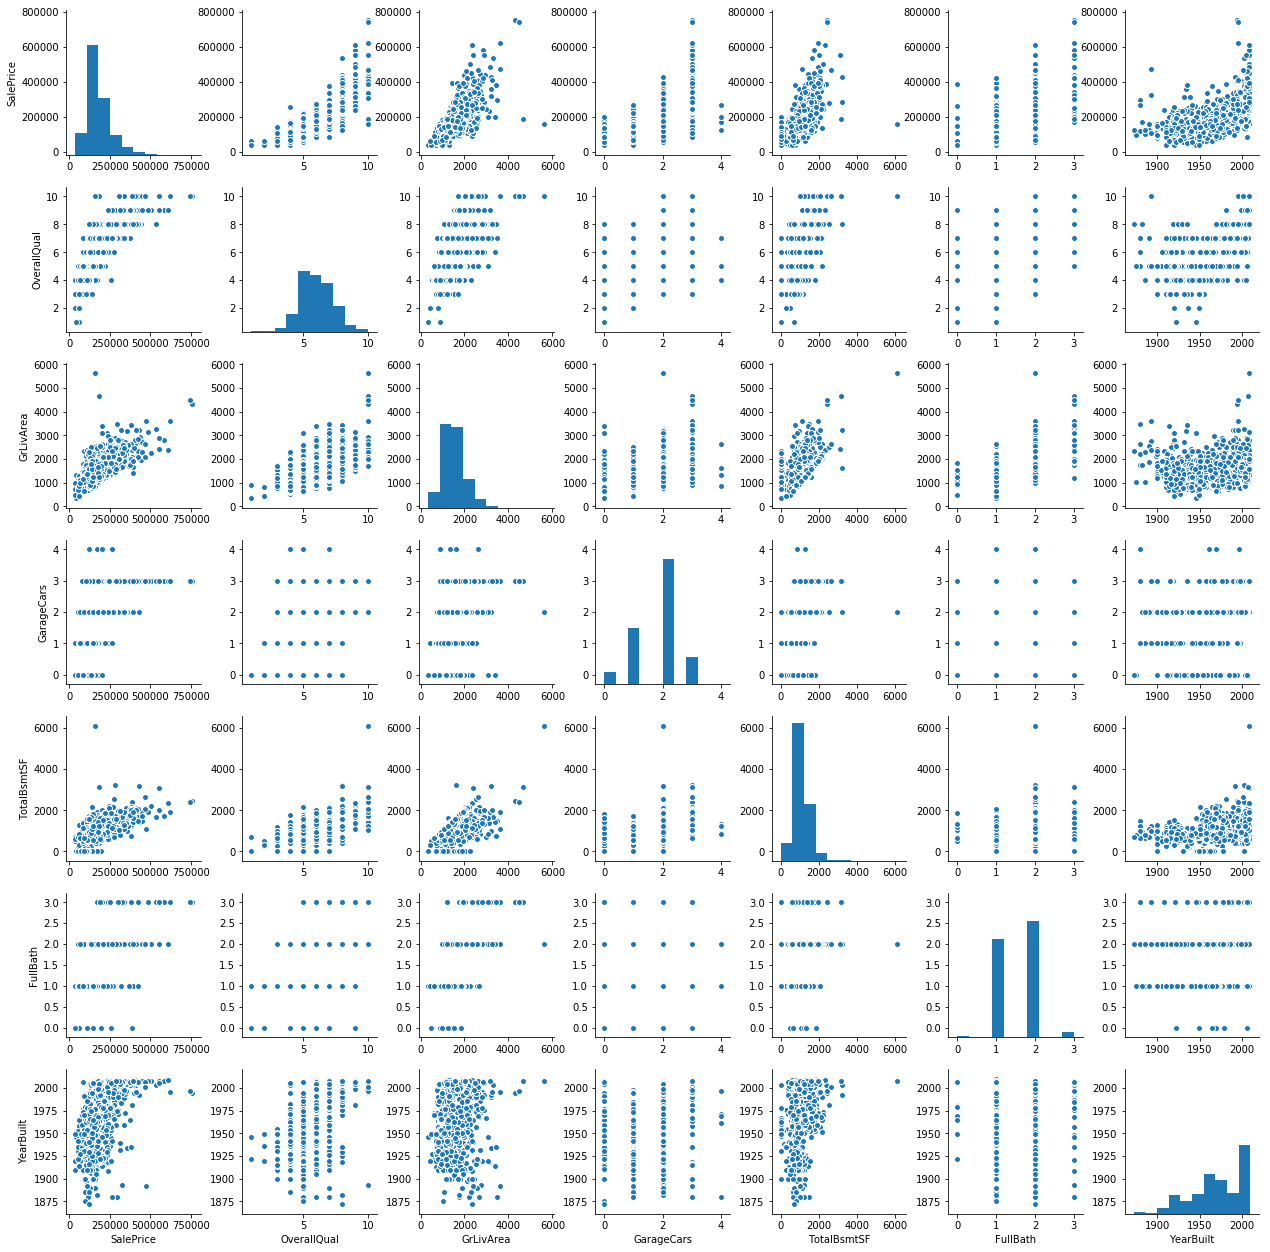

In [16]:
# we removed couple of redundant columns
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)

**Handle missing data**

In [17]:
train[cols].isnull().sum()

SalePrice      0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

#obs:we don't have nulls in the selected attributes

**Outliers:**

In [18]:
scaled=StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
[scaled.argsort()][:10]

[array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]])]

In [20]:
scaled[scaled[:,0].argsort()[:10]]
#lowrange

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439],
       [-1.62337999],
       [-1.61708398],
       [-1.58560389],
       [-1.58560389],
       [-1.5731    ]])

In [21]:

scaled[scaled[:,0].argsort()][-10]

array([3.82897043])

In [22]:
low_range = scaled[scaled[:,0].argsort()][:10]
high_range= scaled[scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


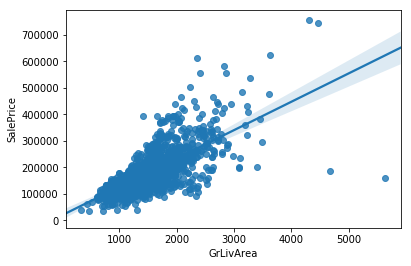

In [23]:
sns.regplot('GrLivArea','SalePrice',data=train)

In [24]:
#deleting the outliers
train['GrLivArea'].sort_values(ascending=False)
train=train.drop(train[train['Id']==1299].index)

In [25]:
train=train.drop(train[train['Id']==523].index)

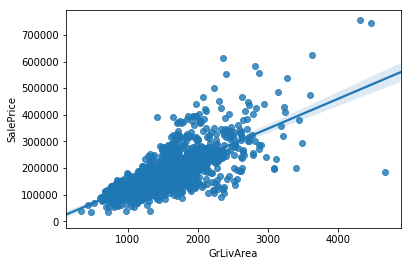

In [26]:
sns.regplot('GrLivArea','SalePrice',data=train)

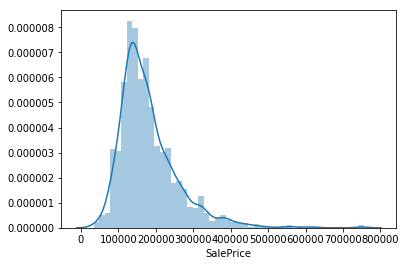

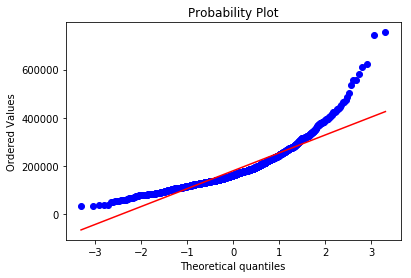

In [27]:
sns.distplot(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [28]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

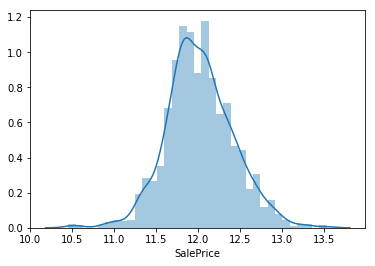

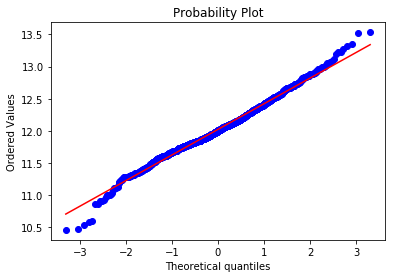

In [29]:
#transformed histogram and normal probability plot
sns.distplot(train['SalePrice']);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

In [30]:

train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

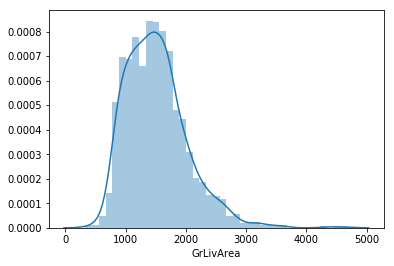

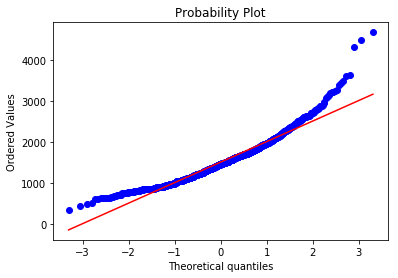

In [31]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

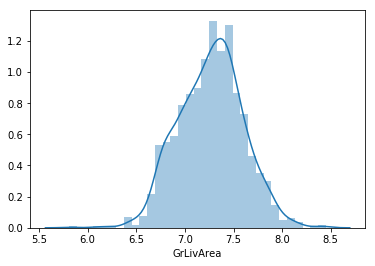

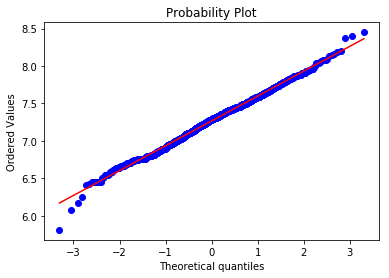

In [32]:
#data transformation
train['GrLivArea'] = np.log(train['GrLivArea'])
#transformed histogram and normal probability plot
sns.distplot(train['GrLivArea']);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

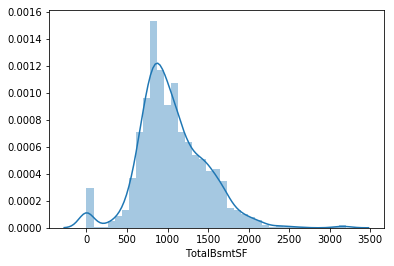

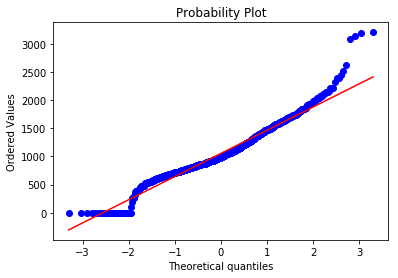

In [33]:
#histogram and normal probability plot
sns.distplot(train['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot=plt)

Something that, in general, presents skewness.
A significant number of observations with value zero (houses without basement).
A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [34]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HasBsmt'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['HasBsmt'] = 0 
train.loc[train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [35]:
#transform data
train.loc[train['HasBsmt']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


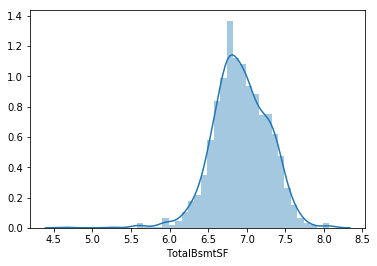

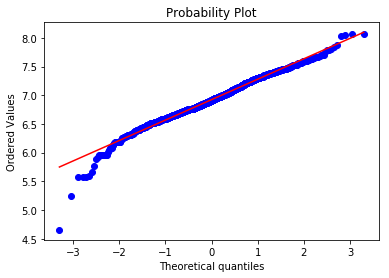

In [36]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF']);
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)